# Explore ML Academy, Hyderabad [![](https://img.shields.io/github/license/sourcerer-io/hall-of-fame.svg?colorB=ff0000)](https://github.com/akshaybahadur21/Emojinator/blob/master/LICENSE.md)  [![](https://img.shields.io/badge/Akshay-Bahadur-brightgreen.svg?colorB=ff0000)](https://akshaybahadur.com)

This python notebook is for explanation of the core concepts used and the models developed for Explore ML Academy.


## Acknowledgement
 <img src="https://ai.google/static/images/share.png" width="650" >


I would like to extend my gratitude towards Open Data Science Conference, India team for giving me this opportunity to showcase my findings.

### Akshay Bahadur

  ###  Software Development Engineer (Symantec)   
  <img src="https://logocurio.us/wp-content/uploads/2015/09/symantec.png" width="650" >


  ###  Google Developer Expert (Machine Learning)
  <img src="https://cdn-images-1.medium.com/max/1200/1*Zkhl4Zz43z2_iR_ADlP-rg.png" width="650" >




## Contact 
   * [Portfolio](https://www.akshaybahadur.com/)
   * [LinkedIN](https://www.linkedin.com/in/akshaybahadur21/)
   * [GitHub](https://github.com/akshaybahadur21)
  
  <!---
  ![Symantec](https://logocurio.us/wp-content/uploads/2015/09/symantec.png)
  ![alt text](http://www.bakno.com/Blog/blog/files/intel-software-innovator_badge_rgb_h_1c.jpg)
  ![alt text](https://res.cloudinary.com/dnnqsdghx/image/upload/w_600,f_auto,q_auto:best/v1522244450/ConfLogos/ccoxln1eev82k3c2jfjy.png)
  ![alt text](https://www.i-programmer.info/images/stories/News/2012/JULY/B/gdevexp1.jpg)-->





In [0]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         359G   30G  311G   9% /
tmpfs           6.4G     0  6.4G   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G   12K  6.4G   1% /var/colab
/dev/sda1       365G   39G  327G  11% /opt/bin
shm             6.0G   12K  6.0G   1% /dev/shm
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [0]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM used: " + humanize.naturalsize( psutil.virtual_memory().used))
printm()

  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM used: 434.8 MB


In [0]:
from keras import Sequential
from keras.callbacks import ModelCheckpoint,Callback
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense, Dropout,Lambda,Conv2D,MaxPooling2D,Activation
from keras.utils import np_utils, print_summary
from keras.models import load_model
from keras import backend as K 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pickle
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
# from scipy.misc import imread
import cv2

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
def showData(x, label):
    pixels = np.array(x, dtype='uint8')

    pixels = pixels.reshape((28, 28))

    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

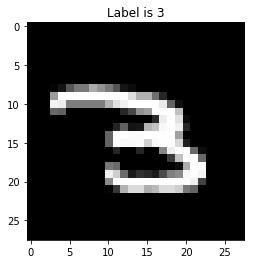

In [0]:
showData(x_train[250], y_train[250])

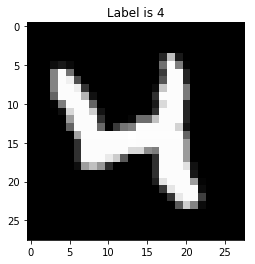

In [0]:
showData(x_train[20], y_train[20])

In [0]:
print(x_train[0].shape)

(28, 28)


In [0]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18


## Normalization

---

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values


In [0]:
x_train_norm= x_train / 255.
x_test_norm=x_test / 255.
print(x_train_norm[0].shape)

(28, 28, 1)


In [0]:
print(x_train_norm[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [0]:
x_train_norm_mean_zero= x_train / 127.5 - 1.
x_test_norm_mean_zero=x_test / 127.5 - 1.

print(x_train_norm_mean_zero[0].shape)

(28, 28, 1)


In [0]:
print(x_train_norm_mean_zero[0])

[[-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.  

In [0]:
def preprocess_labels(y):
    labels = np_utils.to_categorical(y)
    return labels

In [0]:
y_train = preprocess_labels(y_train)
y_test = preprocess_labels(y_test)

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train_norm = x_train_norm.reshape(x_train_norm.shape[0], 28, 28, 1)
x_test_norm = x_test_norm.reshape(x_test_norm.shape[0], 28, 28, 1)

x_train_norm_mean_zero = x_train_norm_mean_zero.reshape(x_train_norm_mean_zero.shape[0], 28, 28, 1)
x_test_norm_mean_zero = x_test_norm_mean_zero.reshape(x_test_norm_mean_zero.shape[0], 28, 28, 1)

print("number of training examples = " + str(x_train.shape[0]))
print("number of test examples = " + str(x_test.shape[0]))
print("X_train shape: " + str(x_train.shape))
print("Y_train shape: " + str(y_train.shape))

number of training examples = 60000
number of test examples = 10000
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)


In [0]:
def keras_model(image_x, image_y):
    num_of_classes = 10
    model = Sequential()
    model.add(Flatten(input_shape=(image_x, image_y, 1)))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(num_of_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    filepath = "mnist_odsc.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    return model, callbacks_list



In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [0]:
model, callbacks_list = keras_model(28, 28)
print_summary(model)
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=64,
              callbacks=callbacks_list)
plot_graphs(history, "acc")
plot_graphs(history, "loss")
K.clear_session()

In [0]:
model, callbacks_list = keras_model(28, 28)
model.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=2, batch_size=64,
              callbacks=callbacks_list)
K.clear_session()

W0730 12:43:24.853958 140483724949376 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0730 12:43:24.894850 140483724949376 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 6s 106us/step - loss: 0.4818 - acc: 0.8527 - val_loss: 0.1559 - val_acc: 0.9523

Epoch 00001: val_acc improved from -inf to 0.95230, saving model to mnist_odsc.h5
Epoch 2/2
60000/60000 [==============================] - 6s 98us/step - loss: 0.2456 - acc: 0.9301 - val_loss: 0.1215 - val_acc: 0.9633

Epoch 00002: val_acc improved from 0.95230 to 0.96330, saving model to mnist_odsc.h5


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 4s 74us/step - loss: 0.8214 - acc: 0.7395 - val_loss: 0.2849 - val_acc: 0.9171

Epoch 00001: val_acc improved from -inf to 0.91710, saving model to mnist_odsc.h5
Epoch 2/2
60000/60000 [==============================] - 4s 68us/step - loss: 0.4935 - acc: 0.8555 - val_loss: 0.2322 - val_acc: 0.9295

Epoch 00002: val_acc improved from 0.91710 to 0.92950, saving model to mnist_odsc.h5


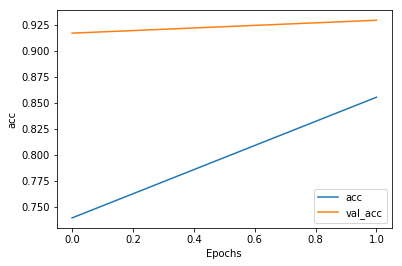

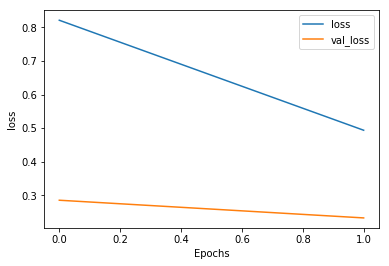

In [0]:
model, callbacks_list = keras_model(28, 28)
history=model.fit(x_train_norm_mean_zero, y_train, validation_data=(x_test_norm_mean_zero, y_test), epochs=2, batch_size=64,
              callbacks=callbacks_list)
plot_graphs(history, "acc")
plot_graphs(history, "loss")
K.clear_session()

## Network Architecture optimization

In [0]:
# Let's go for CIFAR 10
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
def showCifarData(x, label):
    pixels = np.array(x, dtype='uint8')

    pixels = pixels.reshape((32, 32,3))

    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

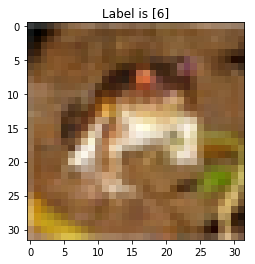

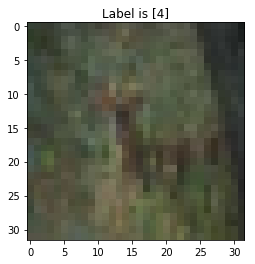

In [0]:
showCifarData(x_train[0],y_train[0])
showCifarData(x_train[10],y_train[10])


In [0]:
y_train = preprocess_labels(y_train)
y_test = preprocess_labels(y_test)
print("number of training examples = " + str(x_train.shape[0]))
print("number of test examples = " + str(x_test.shape[0]))
print("X_train shape: " + str(x_train.shape))
print("Y_train shape: " + str(y_train.shape))

number of training examples = 50000
number of test examples = 10000
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)


In [0]:
def keras_model_cifar(image_x, image_y):
    num_of_classes = 10
    model = Sequential()
    model.add(Flatten(input_shape=(image_x, image_y, 3)))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(num_of_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    filepath = "mnist_odsc.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    return model, callbacks_list

In [0]:
model, callbacks_list = keras_model_cifar(32, 32)
print_summary(model)
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64,
              callbacks=callbacks_list)
K.clear_session()

W0728 13:04:14.725193 140168545089408 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total para

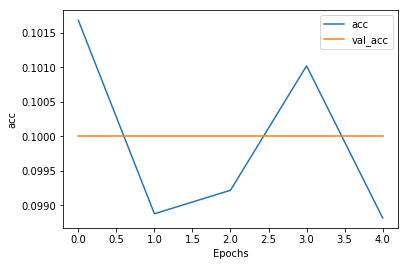

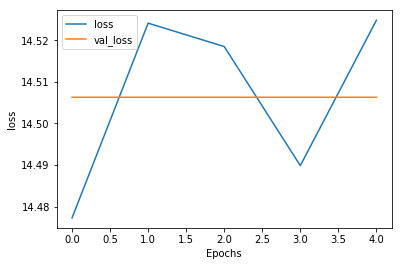

In [0]:
plot_graphs(history, "acc")
plot_graphs(history, "loss")
K.clear_session()

In [0]:
from keras.layers import Conv2D, MaxPooling2D
def keras_model_cifar_conv(image_x, image_y):
    num_of_classes = 10
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(image_x, image_y, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    model.add(Conv2D(64, (5, 5), activation='sigmoid'))
    model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(num_of_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    filepath = "mnist_odsc.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    return model, callbacks_list

In [0]:
model, callbacks_list = keras_model_cifar_conv(32, 32)
print_summary(model)
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64,
              callbacks=callbacks_list)
K.clear_session()

W0728 13:06:01.492557 140168545089408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              263168    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
__________

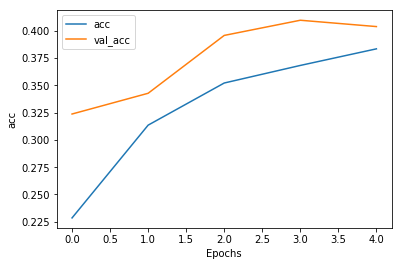

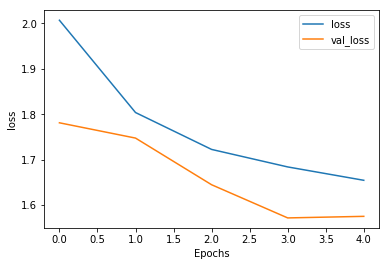

In [0]:
plot_graphs(history, "acc")
plot_graphs(history, "loss")

## Autopilot research paper by NVIDIA

In [0]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1PZWa6H0i1PCH9zuYcIh5Ouk_p-9Gh58B',
                                    dest_path='/content/drive.zip',
                                    unzip=True)

Unzipping...Done.


In [0]:
!du -sh /content/drive.zip

2.9G	/content/drive.zip


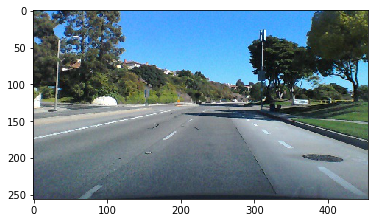

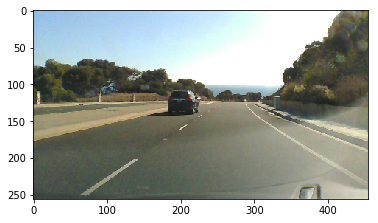

In [0]:
import matplotlib.pyplot as plt
def showData(x, label):
    img = plt.imread(x)
    pixels = np.array(img, dtype='uint8')

    pixels = pixels.reshape((256, 455,3))

    plt.imshow(pixels, cmap='gray')
    plt.show()
showData("/content/data/500.jpg",1)
showData("/content/data/4050.jpg",1)

In [0]:
from keras.layers import BatchNormalization,Input
from keras.layers.convolutional import Convolution2D
import tensorflow as tf
from keras.models import Model

def atan(x):
    return tf.atan(x)
  
#Lets look at the model for the original research paper

def paper_model():
    inputs = Input(shape=(66, 200, 3))
    conv_1 = Convolution2D(24, 5, 5, activation='relu', name='conv_1', subsample=(2, 2))(inputs)
    conv_2 = Convolution2D(36, 5, 5, activation='relu', name='conv_2', subsample=(2, 2))(conv_1)
    conv_3 = Convolution2D(48, 5, 5, activation='relu', name='conv_3', subsample=(2, 2))(conv_2)
    conv_3 = Dropout(.5)(conv_3)

    conv_4 = Convolution2D(64, 3, 3, activation='relu', name='conv_4', subsample=(1, 1))(conv_3)
    conv_5 = Convolution2D(64, 3, 3, activation='relu', name='conv_5', subsample=(1, 1))(conv_4)

    flat = Flatten()(conv_5)

    dense_1 = Dense(1164)(flat)
    dense_1 = Dropout(.5)(flat)
    dense_2 = Dense(100, activation='relu')(dense_1)
    dense_2 = Dropout(.5)(flat)
    dense_3 = Dense(50, activation='relu')(dense_2)
    dense_3 = Dropout(.5)(flat)
    dense_4 = Dense(10, activation='relu')(dense_3)
    dense_4 = Dropout(.5)(flat)

    final = Dense(1, activation=atan)(dense_4)
    model = Model(input=inputs, output=final)
    
    return model
print_summary(paper_model())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 66, 200, 3)        0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 31, 98, 24)        1824      
_________________________________________________________________
conv_2 (Conv2D)              (None, 14, 47, 36)        21636     
_________________________________________________________________
conv_3 (Conv2D)              (None, 5, 22, 48)         43248     
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 22, 48)         0         
_________________________________________________________________
conv_4 (Conv2D)              (None, 3, 20, 64)         27712     
_________________________________________________________________
conv_5 (Conv2D)              (None, 1, 18, 64)         36928     
__________

In [0]:
from __future__ import division
import cv2
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
from itertools import islice
import random

    
LIMIT = None

DATA_FOLDER = '/content'
TRAIN_FILE = os.path.join(DATA_FOLDER, 'data.txt')

def preprocess(img):
    resized = cv2.resize(img, (200 ,200))
    return resized
 

def return_data():

    X = []
    y = []
    features = []

    with open(TRAIN_FILE) as fp:
        for line in islice(fp, LIMIT):
            path = line.strip().split()[0]
            angle=line.strip().split()[1]
            angle=angle[:7]
            full_path = os.path.join("/content/data", path)
            X.append(full_path)
            # using angles from -pi to pi to avoid 
            # rescaling the atan in the network
            y.append(float(angle) * scipy.pi / 180)

    for i in range(len(X)):
        img = plt.imread(X[i])
        features.append(preprocess(img))
        if (i%10000==0):
          print("Images loaded ----> "+str(len(features)))
          printm()
        
    print("preprocessing done")
    feature = np.array(features).astype('float32')
    label = np.array(y).astype('float32')

return_data()

Images loaded ----> 1
Gen RAM used: 446.3 MB
Images loaded ----> 10001
Gen RAM used: 1.9 GB
Images loaded ----> 20001
Gen RAM used: 3.4 GB
Images loaded ----> 30001
Gen RAM used: 4.9 GB
Images loaded ----> 40001
Gen RAM used: 6.3 GB
Images loaded ----> 50001
Gen RAM used: 7.7 GB
Images loaded ----> 60001
Gen RAM used: 8.7 GB
preprocessing done


### Handling out of memory issue

Couple of ways to do this.


*   Scaling the image - The original size of the images is (256, 455,3). Can we crop it ?
*   Removing channels - Instead of using all the colors, can we use black and white image?
*   Applying filters - Apply filters which would make it easier for the model to infer
*   Using fir_generator :  fit_generator function to yield images at runtime.



In [0]:
# Scaling Images (Scaled to 50,50,3)
from __future__ import division
import cv2
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
from itertools import islice
import random

    
LIMIT = None

DATA_FOLDER = '/content'
TRAIN_FILE = os.path.join(DATA_FOLDER, 'data.txt')

def preprocess(img):
    resized = cv2.resize(img, (50 ,50))
    return resized
 

def return_data():

    X = []
    y = []
    features = []

    with open(TRAIN_FILE) as fp:
        for line in islice(fp, LIMIT):
            path = line.strip().split()[0]
            angle=line.strip().split()[1]
            angle=angle[:7]
            full_path = os.path.join("/content/data", path)
            X.append(full_path)
            # using angles from -pi to pi to avoid 
            # rescaling the atan in the network
            y.append(float(angle) * scipy.pi / 180)

    for i in range(len(X)):
        img = plt.imread(X[i])
        features.append(preprocess(img))
        if (i%10000==0):
          print("Images loaded ----> "+str(len(features)))
          printm()
        
    print("preprocessing done")
    features = np.array(features).astype('float32')
    labels = np.array(y).astype('float32')
    with open("features", "wb") as f:
        pickle.dump(features, f, protocol=4)
    with open("labels", "wb") as f:
        pickle.dump(labels, f, protocol=4)

return_data()

Images loaded ----> 1
Gen RAM used: 597.8 MB
Images loaded ----> 10001
Gen RAM used: 678.6 MB
Images loaded ----> 20001
Gen RAM used: 761.6 MB
Images loaded ----> 30001
Gen RAM used: 845.2 MB
Images loaded ----> 40001
Gen RAM used: 928.8 MB
Images loaded ----> 50001
Gen RAM used: 1.0 GB
Images loaded ----> 60001
Gen RAM used: 1.1 GB
preprocessing done


#### Scaling Images

In [0]:
#model for 50,50,3

def loadFromPickle():
    with open("features", "rb") as f:
        features = np.array(pickle.load(f))
    with open("labels", "rb") as f:
        labels = np.array(pickle.load(f))

    return features, labels
  
features, labels = loadFromPickle()
features, labels = shuffle(features, labels)
train_x, test_x, train_y, test_y = train_test_split(features, labels, random_state=0,
                                                    test_size=0.3)
train_x = train_x.reshape(train_x.shape[0], 50, 50, 3)
test_x = test_x.reshape(test_x.shape[0], 50, 50, 3)

def keras_model(image_x, image_y):
    model = Sequential()
    model.add(Lambda(lambda x: x / 127.5 - 1., input_shape=(image_x, image_y, 3)))
    model.add(Conv2D(32, (5,5), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2,2), padding='valid'))

    model.add(Conv2D(32, (5,5), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((5,5), padding='valid'))


    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(128))
    model.add(Dense(10))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss="mse")
    filepath = "Autopilot.h5"
    checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=True)
    callbacks_list = [checkpoint]

    return model, callbacks_list

model, callbacks_list = keras_model(50, 50)
print_summary(model)

history=model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=5, batch_size=32,
              callbacks=callbacks_list)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_3 (Lambda)            (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 32)        2432      
_________________________________________________________________
activation_7 (Activation)    (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 25, 32)        25632     
_________________________________________________________________
activation_8 (Activation)    (None, 25, 25, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 32)          0         
__________

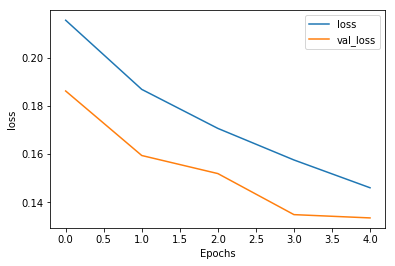

In [0]:
plot_graphs(history, "loss")

#### Adding filters and Splitting channels

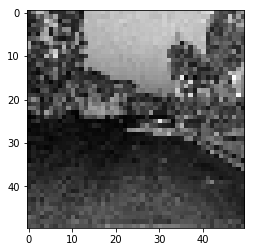

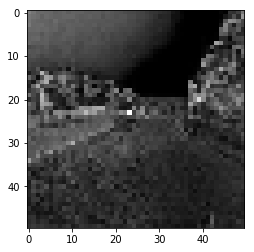

In [0]:
def preprocess_HSV(img):
    resized = cv2.resize((cv2.cvtColor(img, cv2.COLOR_RGB2HSV))[:, :, 1], (50, 50))
    return resized
  
def showData_HSV(x, label):
    img = plt.imread(x)
    img=preprocess_HSV(img)
    pixels = np.array(img, dtype='uint8')
    pixels = pixels.reshape((50, 50))

    plt.imshow(pixels, cmap='gray')
    plt.show()

showData_HSV("/content/data/500.jpg",1)
showData_HSV("/content/data/4050.jpg",1)

In [0]:
import cv2
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
from itertools import islice
import random

    
LIMIT = None

DATA_FOLDER = '/content'
TRAIN_FILE = os.path.join(DATA_FOLDER, 'data.txt')
 

def return_data_HSV():

    X = []
    y = []
    features = []

    with open(TRAIN_FILE) as fp:
        for line in islice(fp, LIMIT):
            path = line.strip().split()[0]
            angle=line.strip().split()[1]
            angle=angle[:7]
            full_path = os.path.join("/content/data", path)
            X.append(full_path)
            # using angles from -pi to pi to 
            # avoid rescaling the atan in the network
            y.append(float(angle) * scipy.pi / 180)

    for i in range(len(X)):
        img = plt.imread(X[i])
        features.append(preprocess_HSV(img))
        if (i%10000==0):
          print("Images loaded ----> "+str(len(features)))
          printm()
        
    print("preprocessing done")
    features = np.array(features).astype('float32')
    labels = np.array(y).astype('float32')
    with open("features_HSV", "wb") as f:
        pickle.dump(features, f, protocol=4)
    with open("labels_HSV", "wb") as f:
        pickle.dump(labels, f, protocol=4)

return_data_HSV()

Images loaded ----> 1
Gen RAM used: 588.9 MB
Images loaded ----> 10001
Gen RAM used: 614.7 MB
Images loaded ----> 20001
Gen RAM used: 646.8 MB
Images loaded ----> 30001
Gen RAM used: 673.6 MB
Images loaded ----> 40001
Gen RAM used: 703.3 MB
Images loaded ----> 50001
Gen RAM used: 730.2 MB
Images loaded ----> 60001
Gen RAM used: 757.6 MB
preprocessing done


In [0]:
def loadFromPickle_HSV():
    with open("features_HSV", "rb") as f:
        features = np.array(pickle.load(f))
    with open("labels_HSV", "rb") as f:
        labels = np.array(pickle.load(f))

    return features, labels
  
features, labels = loadFromPickle_HSV()
features, labels = shuffle(features, labels)
train_x, test_x, train_y, test_y = train_test_split(features, labels, random_state=0,
                                                    test_size=0.3)
train_x = train_x.reshape(train_x.shape[0], 50, 50, 1)
test_x = test_x.reshape(test_x.shape[0], 50, 50, 1)

def keras_model(image_x, image_y):
    model = Sequential()
    model.add(Lambda(lambda x: x / 127.5 - 1., input_shape=(image_x, image_y, 1)))
    model.add(Conv2D(16, (5,5), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((5,5), padding='valid'))

    model.add(Conv2D(32, (5,5), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((5,5), padding='valid'))


    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(128))
    model.add(Dense(10))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss="mse")
    filepath = "Autopilot.h5"
    checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=True)
    callbacks_list = [checkpoint]

    return model, callbacks_list
  
  
model, callbacks_list = keras_model(50, 50)
print_summary(model)
history=model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=5, batch_size=32,
              callbacks=callbacks_list)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 50, 50, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 16)        416       
_________________________________________________________________
activation_3 (Activation)    (None, 50, 50, 16)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 32)        12832     
_________________________________________________________________
activation_4 (Activation)    (None, 10, 10, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 32)          0         
__________

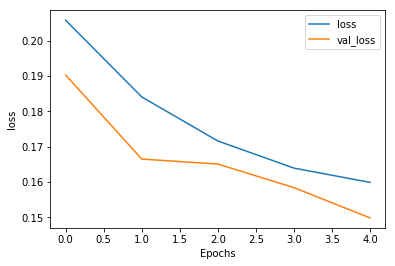

In [0]:
plot_graphs(history, "loss")

#### Fit Generator

In [0]:
from __future__ import division
import cv2
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
from itertools import islice
import random

    
LIMIT = None

DATA_FOLDER = '/content'
TRAIN_FILE = os.path.join(DATA_FOLDER, 'data.txt')

def preprocess(img):
    resized = cv2.resize(img, (200 ,200))
    return resized
  
def generator_from_path(directory, batch_size):
  X,y=return_data()
  batch_features = np.zeros((batch_size, 200, 200, 3))
  batch_labels = np.zeros((batch_size,1))

  while True:
      for i in range(batch_size):
         # choose random index in features
          index= random.randint(0,len(X)-1)
          if index %1000 ==0:
            print(index)
          img = plt.imread(X[index])
          batch_features[i] = preprocess(img)
          batch_labels[i] = y[index]
          yield batch_features, batch_labels

def return_data():

    X = []
    y = []
    features = []

    with open(TRAIN_FILE) as fp:
        for line in islice(fp, LIMIT):
            path = line.strip().split()[0]
            angle=line.strip().split()[1]
            angle=angle[:7]
            full_path = os.path.join("/content/data", path)
            X.append(full_path)
            # using angles from -pi to pi to avoid rescaling the atan in the network
            y.append(float(angle) * scipy.pi / 180)
    return X,y

  
def keras_model(image_x, image_y):
    model = Sequential()
    model.add(Lambda(lambda x: x / 127.5 - 1., input_shape=(image_x, image_y, 3)))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), padding='valid'))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), padding='valid'))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), padding='valid'))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), padding='valid'))

    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(1024))
    model.add(Dense(512))
    model.add(Dense(256))
    model.add(Dense(64))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss="mse")
    filepath = "/tmp/Autopilot_gen.h5"
    checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=True)
    callbacks_list = [checkpoint]

    return model, callbacks_list
  
model, callbacks_list = keras_model(200, 200)
print_summary(model)

class MemTracker(Callback):
    def on_epoch_end(self, batch, logs=None):
       printm()

history=model.fit_generator(generator_from_path('/content/',512),
        samples_per_epoch=32, nb_epoch=5,validation_data=generator_from_path('/content/',128),validation_steps=30, callbacks=[MemTracker()], shuffle=True, use_multiprocessing=True)

model.save('/content/Autopilot_gen.h5')

W0730 12:44:54.967030 140483724949376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 200, 200, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 100, 100, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 32)        0         
__________

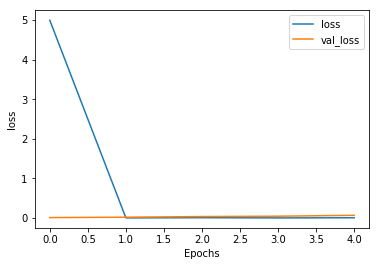

In [0]:
plot_graphs(history, "loss")